In [1]:
import pandas as pd
import yfinance as yf
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import dash_bootstrap_components as dbc

In [3]:
nasdaq = pd.read_html('Quotes For Nasdaq-100 Index _ Nasdaq.html')[0]

In [4]:
# Read the HTML table and extract symbols
nasdaq = pd.read_html('Quotes For Nasdaq-100 Index _ Nasdaq.html')[0]
symbols = nasdaq['Symbol'].tolist()

# Fetch historical stock data for each symbol for the last 6 years
stock_data = {}
for symbol in symbols:
    try:
        stock = yf.Ticker(symbol)
        stock_data[symbol] = stock.history(period="5y")  # Fetching historical data for the last 6 years
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Concatenate all stock data into a single DataFrame
stock_df = pd.concat(stock_data.values(), keys=stock_data.keys())

# Reset index to make it cleaner
stock_df.reset_index(inplace=True)
stock_df.rename(columns={'level_0': 'Symbol', 'Date': 'Date_Time'}, inplace=True)

In [5]:
stock_df

,Symbol,Date_Time,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,AAPL,2019-04-29 00:00:00-04:00,49.193906,49.571767,49.063944,49.244450,88818800,0.0,0.0
1,AAPL,2019-04-30 00:00:00-04:00,48.871408,48.953237,47.920744,48.296196,186139600,0.0,0.0
2,AAPL,2019-05-01 00:00:00-04:00,50.512804,51.819666,50.356363,50.666836,259309200,0.0,0.0
3,AAPL,2019-05-02 00:00:00-04:00,50.503179,51.179474,50.091627,50.337112,127985200,0.0,0.0
4,AAPL,2019-05-03 00:00:00-04:00,50.755891,50.984531,50.597045,50.962872,83569600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
123968,ZS,2024-04-22 00:00:00-04:00,170.000000,172.160004,166.759995,170.970001,1307900,0.0,0.0
123969,ZS,2024-04-23 00:00:00-04:00,171.210007,178.250000,171.210007,176.919998,2180100,0.0,0.0
123970,ZS,2024-04-24 00:00:00-04:00,179.139999,181.800003,176.039993,177.460007,1372100,0.0,0.0
123971,ZS,2024-04-25 00:00:00-04:00,173.679993,176.419998,172.250000,174.809998,1078700,0.0,0.0


In [6]:
# Return
stock_df['Return'] = stock_df.groupby('Symbol')['Close'].pct_change()

stock_df['Acc_Return'] = stock_df.groupby('Symbol')['Return'].transform(lambda x: (x + 1).cumprod() - 1)

# Drop NaN values resulting from the percentage change calculation
stock_df.fillna(0, inplace=True)

In [7]:
stock_df

,Symbol,Date_Time,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Acc_Return
0,AAPL,2019-04-29 00:00:00-04:00,49.193906,49.571767,49.063944,49.244450,88818800,0.0,0.0,0.000000,0.000000
1,AAPL,2019-04-30 00:00:00-04:00,48.871408,48.953237,47.920744,48.296196,186139600,0.0,0.0,-0.019256,-0.019256
2,AAPL,2019-05-01 00:00:00-04:00,50.512804,51.819666,50.356363,50.666836,259309200,0.0,0.0,0.049085,0.028884
3,AAPL,2019-05-02 00:00:00-04:00,50.503179,51.179474,50.091627,50.337112,127985200,0.0,0.0,-0.006508,0.022189
4,AAPL,2019-05-03 00:00:00-04:00,50.755891,50.984531,50.597045,50.962872,83569600,0.0,0.0,0.012431,0.034896
...,...,...,...,...,...,...,...,...,...,...,...
123968,ZS,2024-04-22 00:00:00-04:00,170.000000,172.160004,166.759995,170.970001,1307900,0.0,0.0,0.010401,1.506892
123969,ZS,2024-04-23 00:00:00-04:00,171.210007,178.250000,171.210007,176.919998,2180100,0.0,0.0,0.034801,1.594135
123970,ZS,2024-04-24 00:00:00-04:00,179.139999,181.800003,176.039993,177.460007,1372100,0.0,0.0,0.003052,1.602053
123971,ZS,2024-04-25 00:00:00-04:00,173.679993,176.419998,172.250000,174.809998,1078700,0.0,0.0,-0.014933,1.563197


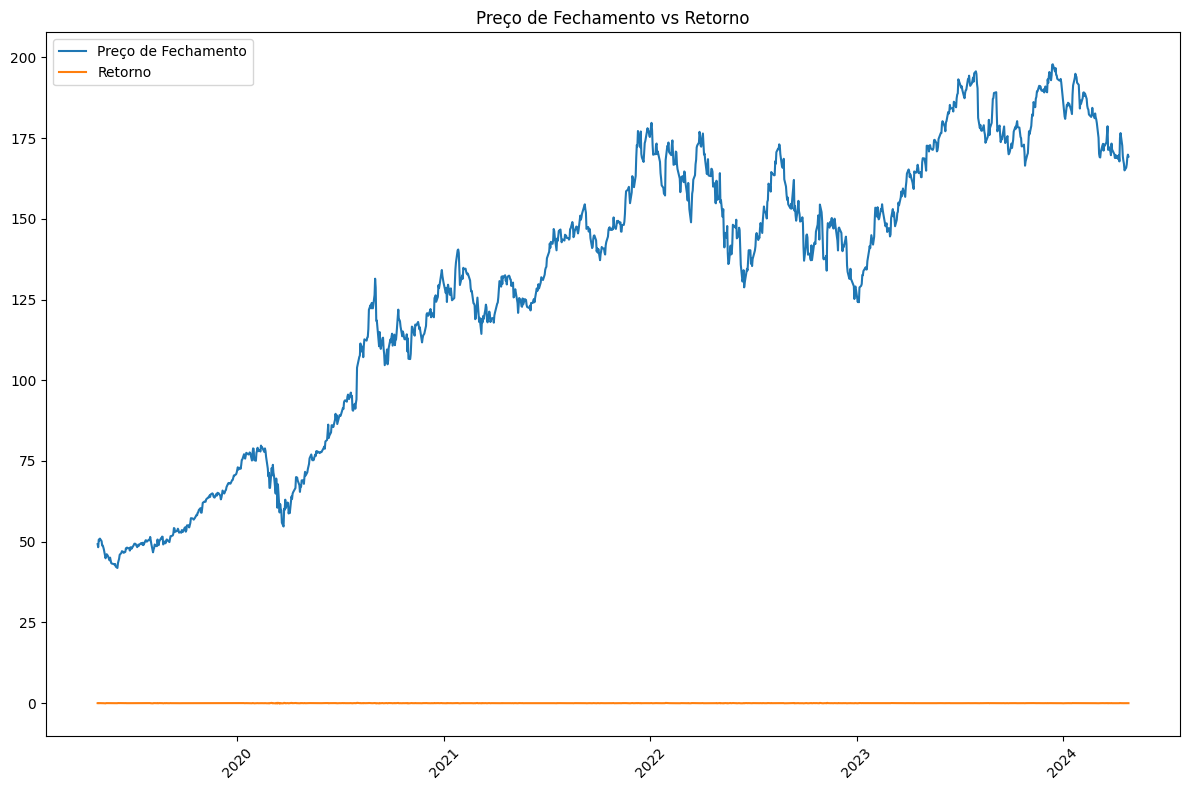

In [8]:
# Filter for AAPL
aapl_df = stock_df[stock_df['Symbol'] == 'AAPL']

# Plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date_Time', y='Close', data=aapl_df, label='Preço de Fechamento')
sns.lineplot(x='Date_Time', y='Return', data=aapl_df, label='Retorno')
plt.title('Preço de Fechamento vs Retorno')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\fabri\AppData\Local\Temp\ipykernel_21904\4159351078.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['RSI'] = calculate_rsi(aapl_df)


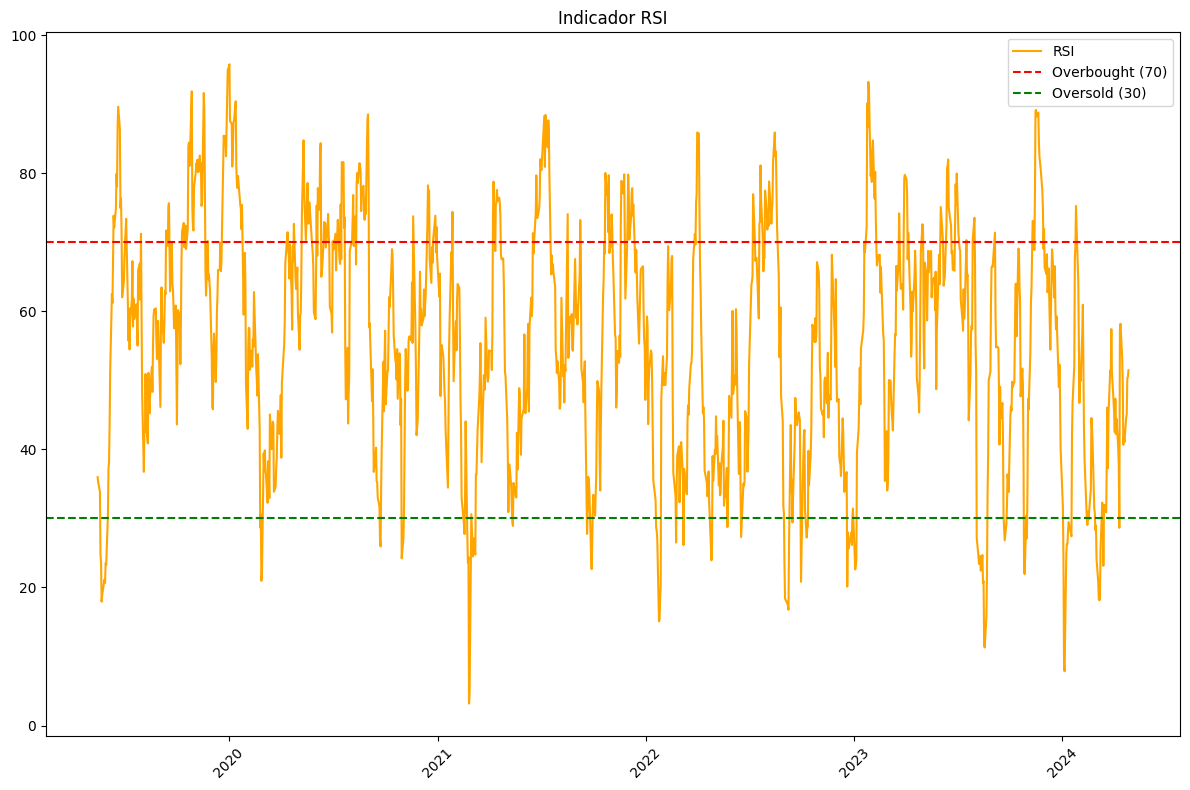

In [9]:
# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Assuming aapl_df contains the data including 'Close' prices and 'Date_Time'

# Calculate RSI
aapl_df['RSI'] = calculate_rsi(aapl_df)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(aapl_df['Date_Time'], aapl_df['RSI'], label='RSI', color='orange')  # Plot RSI
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')  # Overbought line
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')  # Oversold line
plt.title('Indicador RSI')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\fabri\AppData\Local\Temp\ipykernel_21904\3267502546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['Volatility'] = aapl_df['Close'].rolling(window=21).std()*np.sqrt(252)
C:\Users\fabri\AppData\Local\Temp\ipykernel_21904\3267502546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['Volatility'] = aapl_df['Volatility']/100


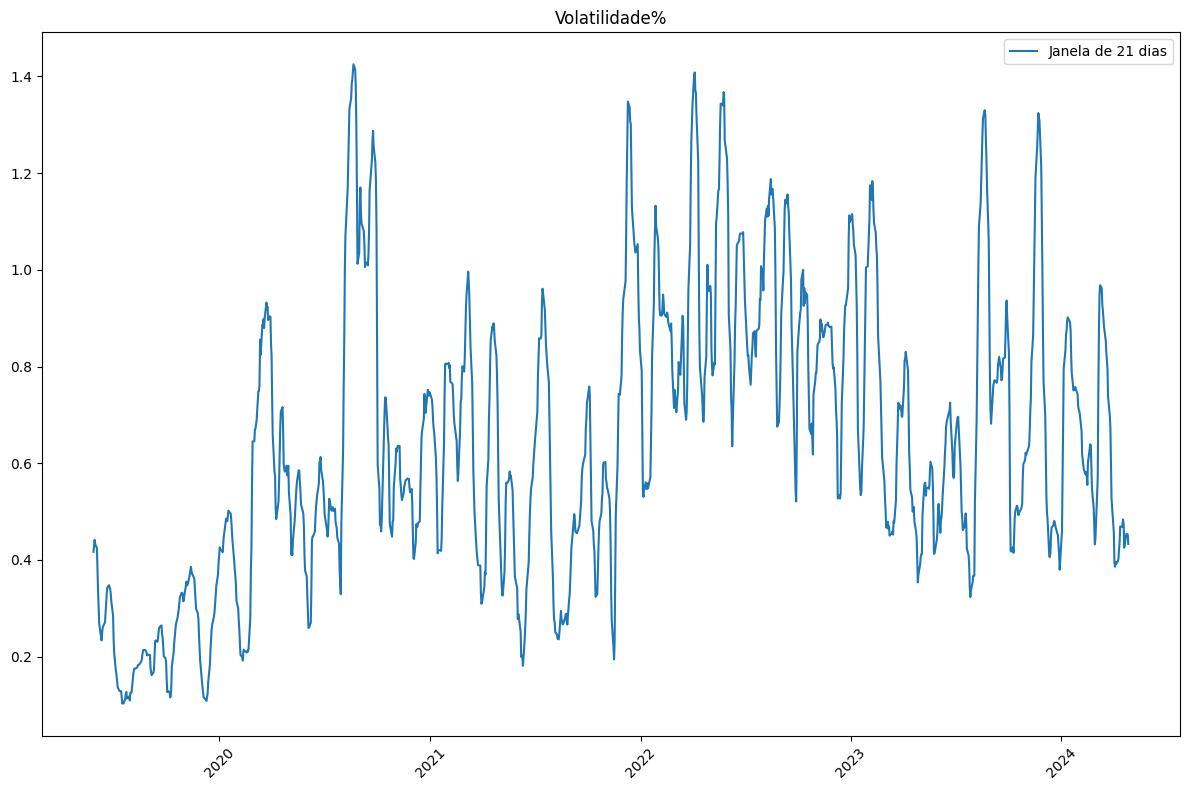

In [10]:
# Calculate rolling standard deviation
aapl_df['Volatility'] = aapl_df['Close'].rolling(window=21).std()*np.sqrt(252)
aapl_df['Volatility'] = aapl_df['Volatility']/100

# Plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date_Time', y='Volatility', data=aapl_df, label='Janela de 21 dias')
plt.title('Volatilidade%')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\fabri\AppData\Local\Temp\ipykernel_21904\1869388132.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



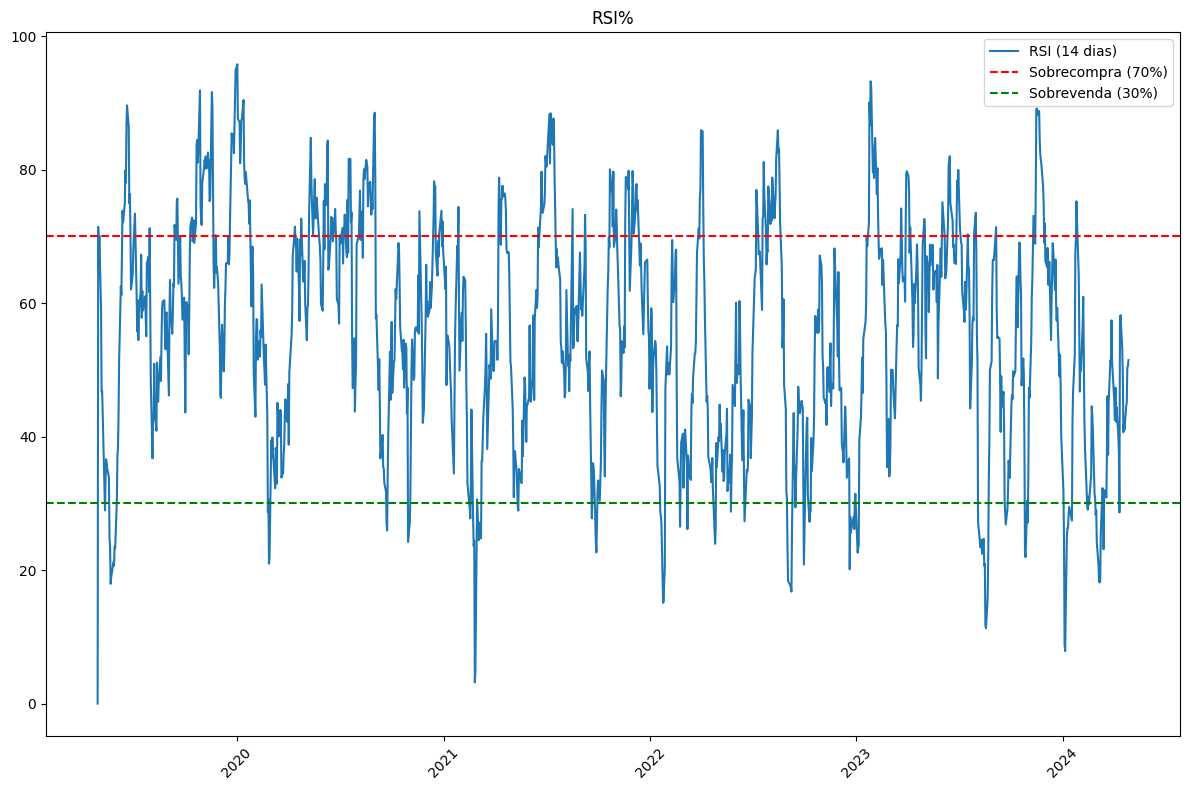

In [17]:
# Calculate price changes
aapl_df['Price Change'] = aapl_df['Close'].diff()

# Separate gains and losses
gains = aapl_df['Price Change'].where(aapl_df['Price Change'] > 0, 0)
losses = -aapl_df['Price Change'].where(aapl_df['Price Change'] < 0, 0)

# Calculate average gains and losses over a specified period (e.g., 14 days)
window = 14
avg_gain = gains.rolling(window=window, min_periods=1).mean()
avg_loss = losses.rolling(window=window, min_periods=1).mean()

# Calculate Relative Strength (RS)
rs = avg_gain / avg_loss

# Calculate RSI
rsi = 100 - (100 / (1 + rs))

# Plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date_Time', y=rsi, data=aapl_df, label='RSI (14 dias)')
plt.axhline(y=70, color='r', linestyle='--', label='Sobrecompra (70%)')
plt.axhline(y=30, color='g', linestyle='--', label='Sobrevenda (30%)')
plt.title('RSI%')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\fabri\AppData\Local\Temp\ipykernel_21904\989337333.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fabri\AppData\Local\Temp\ipykernel_21904\989337333.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fabri\AppData\Local\Temp\ipykernel_21904\989337333.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

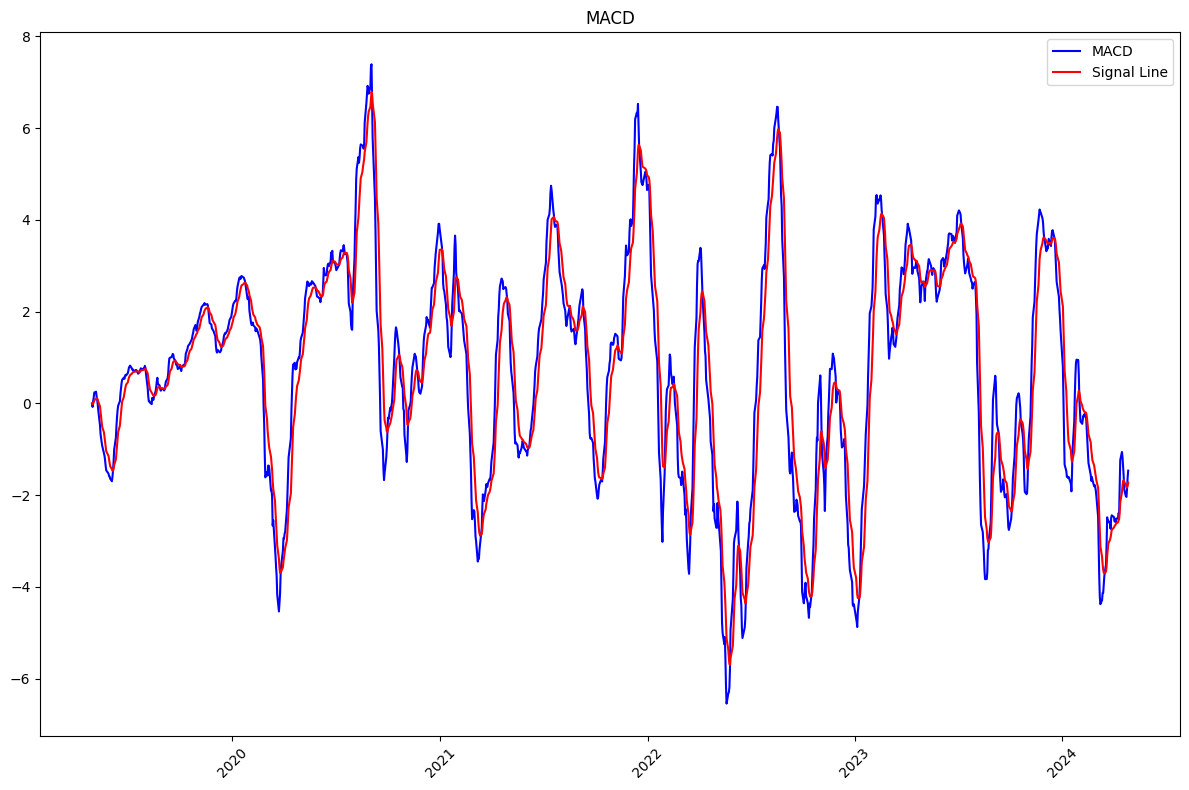

In [19]:
# Calculate MACD
aapl_df['12_Day_EMA'] = aapl_df['Close'].ewm(span=12, adjust=False).mean()
aapl_df['26_Day_EMA'] = aapl_df['Close'].ewm(span=26, adjust=False).mean()
aapl_df['MACD'] = aapl_df['12_Day_EMA'] - aapl_df['26_Day_EMA']
aapl_df['Signal_Line'] = aapl_df['MACD'].ewm(span=9, adjust=False).mean()

# Plot
plt.figure(figsize=(12, 8))

# Plot MACD line
plt.plot(aapl_df['Date_Time'], aapl_df['MACD'], label='MACD', color='blue')

# Plot Signal line
plt.plot(aapl_df['Date_Time'], aapl_df['Signal_Line'], label='Signal Line', color='red')

plt.title('MACD')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the Dash app
app.layout = html.Div([
    html.H1("Stock Market Analysis"),
    html.Label("Select the asset:"),
    dcc.Dropdown(
        id='stock-dropdown',
        options=[{'label': symbol, 'value': symbol} for symbol in stock_df['Symbol'].unique()],
        value=stock_df['Symbol'].iloc[0]
    ),
    dcc.Graph(id='volatility-graph'),
    dcc.Graph(id='accumulated-return-graph'),
    dcc.Graph(id='rsi-ewma-graph'),
    dcc.Graph(id='macd-graph')
])

# Define callback to update the volatility graph
@app.callback(
    Output('volatility-graph', 'figure'),
    [Input('stock-dropdown', 'value')]
)
def update_volatility_graph(selected_stock):
    filtered_df = stock_df[stock_df['Symbol'] == selected_stock].reset_index(drop=True)
    volatility = filtered_df['Return'].rolling(window=21).std() * 100  # Adjusted to multiply by 100
    return {
        'data': [{
            'x': filtered_df['Date_Time'],
            'y': volatility,
            'type': 'line',
            'name': 'Volatility'
        }],
        'layout': {
            'title': 'Volatilidade Anualizada (%)',  # Adjusted title for clarity
            'xaxis': {'title': 'Data'}
        }
    }

# Define callback to update the accumulated return graph
@app.callback(
    Output('accumulated-return-graph', 'figure'),
    [Input('stock-dropdown', 'value')]
)
def update_accumulated_return_graph(selected_stock):
    filtered_df = stock_df[stock_df['Symbol'] == selected_stock].reset_index(drop=True)
    accumulated_return = ((1 + filtered_df['Return']).cumprod() - 1) * 100
    return {
        'data': [{
            'x': filtered_df['Date_Time'],
            'y': accumulated_return,
            'type': 'line',
            'name': 'Accumulated Return'
        }],
        'layout': {
            'title': 'Retorno Acumulado (%)',  # Adjusted title for clarity
            'xaxis': {'title': 'Data'}
        }
    }

# Define callback to update the RSI graph
@app.callback(
    Output('rsi-ewma-graph', 'figure'),
    [Input('stock-dropdown', 'value')]
)
def update_rsi_ewma_graph(selected_stock):
    filtered_df = stock_df[stock_df['Symbol'] == selected_stock].reset_index(drop=True)
    rsi_ewma = calculate_rsi(filtered_df)  # Assuming calculate_rsi function is defined elsewhere
    return {
        'data': [{
            'x': filtered_df['Date_Time'],
            'y': rsi_ewma,
            'type': 'line',
            'name': 'RSI'
        }],
        'layout': {
            'title': 'Relative Strength Index (RSI)',  # Adjusted title for clarity
            'xaxis': {'title': 'Data'},
            'shapes': [
                {
                    'type': 'line',
                    'x0': filtered_df['Date_Time'].iloc[0],
                    'y0': 70,
                    'x1': filtered_df['Date_Time'].iloc[-1],
                    'y1': 70,
                    'line': {
                        'color': 'red',
                        'width': 2,
                        'dash': 'dash',
                    },
                },
                {
                    'type': 'line',
                    'x0': filtered_df['Date_Time'].iloc[0],
                    'y0': 30,
                    'x1': filtered_df['Date_Time'].iloc[-1],
                    'y1': 30,
                    'line': {
                        'color': 'green',
                        'width': 2,
                        'dash': 'dash',
                    },
                }
            ]
        }
    }

# Calculate MACD
def calculate_macd(data, short_window=12, long_window=26):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=9, adjust=False).mean()
    return macd, signal_line

# Define callback to update the MACD graph
@app.callback(
    Output('macd-graph', 'figure'),
    [Input('stock-dropdown', 'value')]
)
def update_macd_graph(selected_stock):
    filtered_df = stock_df[stock_df['Symbol'] == selected_stock].reset_index(drop=True)
    macd, signal_line = calculate_macd(filtered_df['Close'])  # Assuming calculate_macd function is defined elsewhere
    return {
        'data': [
            {
                'x': filtered_df['Date_Time'],
                'y': macd,
                'type': 'line',
                'name': 'MACD'
            },
            {
                'x': filtered_df['Date_Time'],
                'y': signal_line,
                'type': 'line',
                'name': 'Signal Line'
            }
        ],
        'layout': {
            'title': 'Moving Average Convergence Divergence (MACD)',  # Adjusted title for clarity
            'xaxis': {'title': 'Data'}
        }
    }

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)

In [12]:
stock_df

,Symbol,Date_Time,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Acc_Return
0,AAPL,2019-04-29 00:00:00-04:00,49.193906,49.571767,49.063944,49.244450,88818800,0.0,0.0,0.000000,0.000000
1,AAPL,2019-04-30 00:00:00-04:00,48.871408,48.953237,47.920744,48.296196,186139600,0.0,0.0,-0.019256,-0.019256
2,AAPL,2019-05-01 00:00:00-04:00,50.512804,51.819666,50.356363,50.666836,259309200,0.0,0.0,0.049085,0.028884
3,AAPL,2019-05-02 00:00:00-04:00,50.503179,51.179474,50.091627,50.337112,127985200,0.0,0.0,-0.006508,0.022189
4,AAPL,2019-05-03 00:00:00-04:00,50.755891,50.984531,50.597045,50.962872,83569600,0.0,0.0,0.012431,0.034896
...,...,...,...,...,...,...,...,...,...,...,...
123968,ZS,2024-04-22 00:00:00-04:00,170.000000,172.160004,166.759995,170.970001,1307900,0.0,0.0,0.010401,1.506892
123969,ZS,2024-04-23 00:00:00-04:00,171.210007,178.250000,171.210007,176.919998,2180100,0.0,0.0,0.034801,1.594135
123970,ZS,2024-04-24 00:00:00-04:00,179.139999,181.800003,176.039993,177.460007,1372100,0.0,0.0,0.003052,1.602053
123971,ZS,2024-04-25 00:00:00-04:00,173.679993,176.419998,172.250000,174.809998,1078700,0.0,0.0,-0.014933,1.563197
